### 1.导入相关库

In [8]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 2.导入需要的数据集

In [5]:
wine = load_wine()

### 3.复习sklearn的建模流程

In [6]:
Xtrain,Xtest,Ytrain,Ytest  = train_test_split(wine.data,wine.target,test_size=0.3)
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)

rfc = RandomForestClassifier(random_state=25)
rfc = rfc.fit(Xtrain,Ytrain)

score_c=clf.score(Xtest,Ytest)
score_r=rfc.score(Xtest,Ytest)

print("Single Tree:{}".format(score_c),"RandomForest:{}".format(score_r))

Single Tree:0.9629629629629629 RandomForest:0.9814814814814815


D:\develop\Anaconda3\envs\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 4.画出随机森林和决策树在一组交叉验证下的效果对比

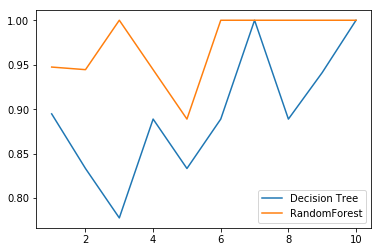

In [15]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=100)
score_cs =cross_val_score(clf,wine.data,wine.target,cv=10)
score_rs =cross_val_score(rfc,wine.data,wine.target,cv=10)

plt.plot(range(1,11),score_cs,label="Decision Tree")
plt.plot(range(1,11),score_rs,label="RandomForest")
plt.legend()
plt.show()

### 5.画出随机森林和决策树在十组交叉验证下的效果对比

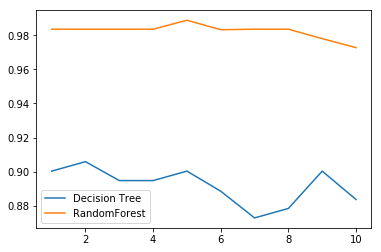

In [18]:
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=100)
    clf = DecisionTreeClassifier()
    clf_score= cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    rfc_score= cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_score)
    clf_l.append(clf_score)
plt.plot(range(1,11),clf_l,label='Decision Tree')
plt.plot(range(1,11),rfc_l,label='RandomForest')
plt.legend()
plt.show()

### 6.n_estimators的学习曲线

0.9944444444444445 25


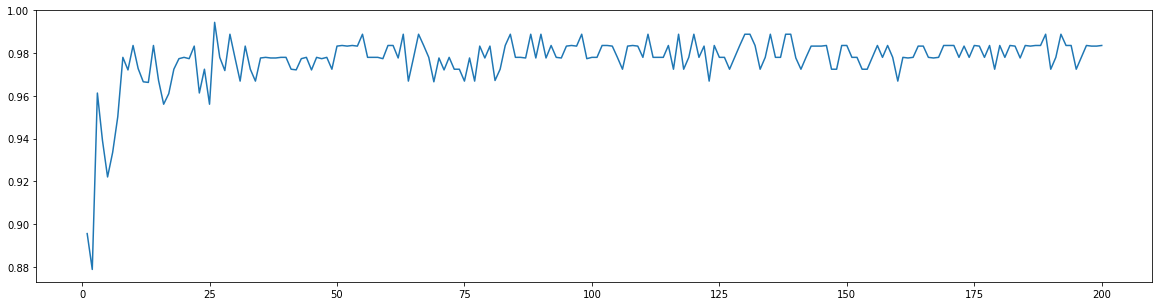

In [19]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

### 7.random_state的研究

In [21]:
import numpy as np
from scipy.special import comb

np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [25]:
rfc =  RandomForestClassifier(n_estimators=25,random_state=2) #随机森林的random_state决定的是森林的随机模式，而决策树决定的是树本身的随机模式
rfc = rfc.fit(Xtrain,Ytrain)
rfc.estimators_  #estimators_属性，囊括了随机森林中的每一颗树

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                  

In [26]:
rfc.estimators_[0].random_state

1872583848

In [27]:
rfc.estimators_[1].random_state

794921487

### 8.bootstrap&oob_score的研究

In [28]:
#bootstrap指的是有放回抽样，默认True
#袋外数据(out of bag data，简写为oob),默认false
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)
rfc.oob_score_

0.9719101123595506

### 9.feature_importances这个属性

In [29]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain,Ytrain)
rfc.score(Xtest,Ytest)

0.9814814814814815

In [31]:
rfc.apply(Xtest)

array([[20,  9,  7, ..., 16, 19, 18],
       [ 8, 12, 15, ...,  8,  9,  2],
       [ 5, 19,  2, ...,  6,  5, 14],
       ...,
       [ 8, 15, 18, ..., 16, 19,  2],
       [20, 22, 18, ..., 16, 19, 18],
       [ 5,  3,  2, ...,  6,  5, 11]], dtype=int64)

In [32]:
rfc.predict(Xtest)

array([0, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 2, 0, 1, 0, 2])

In [33]:
rfc.predict_proba(Xtest)

array([[0.96, 0.04, 0.  ],
       [0.04, 0.92, 0.04],
       [0.  , 0.08, 0.92],
       [0.  , 1.  , 0.  ],
       [0.64, 0.36, 0.  ],
       [0.04, 0.24, 0.72],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.08, 0.88],
       [0.16, 0.08, 0.76],
       [0.2 , 0.8 , 0.  ],
       [0.  , 0.12, 0.88],
       [0.  , 0.04, 0.96],
       [1.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.08, 0.92, 0.  ],
       [0.04, 0.92, 0.04],
       [0.  , 0.92, 0.08],
       [0.16, 0.08, 0.76],
       [0.  , 0.68, 0.32],
       [0.76, 0.24, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.32, 0.68, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.48, 0.52, 0.  ],
       [0.08, 0.04, 0.88],
       [0.  , 0.92, 0.08],
       [0.04, 0.96, 0.  ],
       [0.04, 0.24, 0.72],
       [0.  , 1.  , 0.  ],
       [0.16, 0.12, 0.72],
       [0.04, 0.96, 0.  ],
       [0.92, 0.08, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.28, 0.68],
       [0.  , 0.08, 0.92],
       [0.88, 0.08, 0.04],
 

### 10.Bagging的另一个必要条件

* 袋装法还有另一个必要条件：基分类器的判断准
* 确率至少要超过随机分类器，即时说，基分类器的判断准确率至少要超过50%

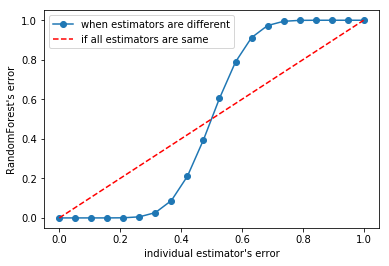

In [36]:
# 随机森林的准确率公式，基于这个公式，我们画出基分类器的误差率ε和随机森林的误差率之间的图像
import numpy as np
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))
         for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()